In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
env = gym.make('FrozenLake-v0')

Q = np.zeros([env.observation_space.n,env.action_space.n]) #Initialize table with all zeros

dis = 0.99
learning_rate = .85
num_episodes = 2000 #set learning parameters

rList=[]
for i in range(num_episodes):
    state=env.reset() #reset environment
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n)/(i+1))
        new_state, reward, done,_ = env.step(action) #get new stse and reward from enviroment
        Q[state,action] = (1-learning_rate)*Q[state,action] + learning_rate*(reward+dis * np.max(Q[new_state,:]))
        rAll +=reward
        state = new_state
    rList.append(rAll)

C:\Users\HW-steve\Anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Success rate: 0.479
Rinal Q-Table Values
Left Down Right Up
[[2.02018405e-02 3.39046245e-03 4.73898193e-01 1.41017915e-02]
 [3.80057664e-04 0.00000000e+00 1.08733364e-03 2.35461322e-01]
 [8.44365551e-03 0.00000000e+00 1.34809262e-02 1.34944162e-01]
 [2.03357378e-03 0.00000000e+00 6.52621345e-04 1.21010068e-01]
 [3.55155882e-01 8.31913102e-06 1.74510845e-03 1.56604549e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.37157552e-04 4.08900743e-05 9.14356944e-03 9.77044741e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.45796393e-03 2.76883926e-03 3.37168283e-01]
 [0.00000000e+00 3.50821560e-01 4.66944503e-04 0.00000000e+00]
 [1.11378670e-01 8.58737639e-05 2.20546684e-05 5.68561780e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.74816296e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.47788278e

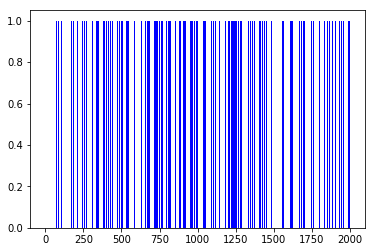

In [3]:
print("Success rate: " +str(sum(rList)/num_episodes))
print("Rinal Q-Table Values")
print("Left Down Right Up")
print(Q)
plt.bar(range(len(rList)),rList,color='blue')
plt.show()